# Clasification.ipynb

### Ryan Servera (260741736)

# 3 Image Classification

## 3.1 Coding Questions

## Training

## 1. Resize the training images to 128 × 128.

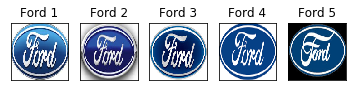

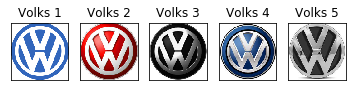

In [2]:
# Useful imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load all of the pictures 
ford_train1 = cv2.imread("./dataset/ford_train1.jpeg")
ford_train2 = cv2.imread("./dataset/ford_train2.jpeg")
ford_train3 = cv2.imread("./dataset/ford_train3.jpeg")
ford_train4 = cv2.imread("./dataset/ford_train4.png")
ford_train5 = cv2.imread("./dataset/ford_train5.jpeg")
volks_train1 = cv2.imread("./dataset/volks_train1.png")
volks_train2 = cv2.imread("./dataset/volks_train2.jpeg")
volks_train3 = cv2.imread("./dataset/volks_train3.jpeg")
volks_train4 = cv2.imread("./dataset/volks_train4.jpeg")
volks_train5 = cv2.imread("./dataset/volks_train5.jpeg")

ford_train1 = cv2.cvtColor(ford_train1, cv2.COLOR_BGR2RGB)
ford_train2 = cv2.cvtColor(ford_train2, cv2.COLOR_BGR2RGB)
ford_train3 = cv2.cvtColor(ford_train3, cv2.COLOR_BGR2RGB)
ford_train4 = cv2.cvtColor(ford_train4, cv2.COLOR_BGR2RGB)
ford_train5 = cv2.cvtColor(ford_train5, cv2.COLOR_BGR2RGB)
volks_train1 = cv2.cvtColor(volks_train1, cv2.COLOR_BGR2RGB)
volks_train2 = cv2.cvtColor(volks_train2, cv2.COLOR_BGR2RGB)
volks_train3 = cv2.cvtColor(volks_train3, cv2.COLOR_BGR2RGB)
volks_train4 = cv2.cvtColor(volks_train4, cv2.COLOR_BGR2RGB)
volks_train5 = cv2.cvtColor(volks_train5, cv2.COLOR_BGR2RGB)

# Resize all of the pictures
ford_train1 = cv2.resize(ford_train1, (128, 128))
ford_train2 = cv2.resize(ford_train2, (128, 128))
ford_train3 = cv2.resize(ford_train3, (128, 128))
ford_train4 = cv2.resize(ford_train4, (128, 128))
ford_train5 = cv2.resize(ford_train5, (128, 128))
volks_train1 = cv2.resize(volks_train1, (128, 128))
volks_train2 = cv2.resize(volks_train2, (128, 128))
volks_train3 = cv2.resize(volks_train3, (128, 128))
volks_train4 = cv2.resize(volks_train4, (128, 128))
volks_train5 = cv2.resize(volks_train5, (128, 128))

# Display all of the resized pictures
plt.subplot(251)
plt.imshow(ford_train1)
plt.title("Ford 1"), plt.xticks([]), plt.yticks([])

plt.subplot(252)
plt.imshow(ford_train2)
plt.title("Ford 2"), plt.xticks([]), plt.yticks([])

plt.subplot(253)
plt.imshow(ford_train3)
plt.title("Ford 3"), plt.xticks([]), plt.yticks([])

plt.subplot(254)
plt.imshow(ford_train4)
plt.title("Ford 4"), plt.xticks([]), plt.yticks([])

plt.subplot(255)
plt.imshow(ford_train5)
plt.title("Ford 5"), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(256)
plt.imshow(volks_train1)
plt.title("Volks 1"), plt.xticks([]), plt.yticks([])

plt.subplot(257)
plt.imshow(volks_train2)
plt.title("Volks 2"), plt.xticks([]), plt.yticks([])

plt.subplot(258)
plt.imshow(volks_train3)
plt.title("Volks 3"), plt.xticks([]), plt.yticks([])

plt.subplot(259)
plt.imshow(volks_train4)
plt.title("Volks 4"), plt.xticks([]), plt.yticks([])

plt.subplot(2,5,10)
plt.imshow(volks_train5)
plt.title("Volks 5"), plt.xticks([]), plt.yticks([])
plt.show()

## 2. Compute HoG features of size (32,32,8). Apply blocknorm in 4 × 4 cell neighborhood

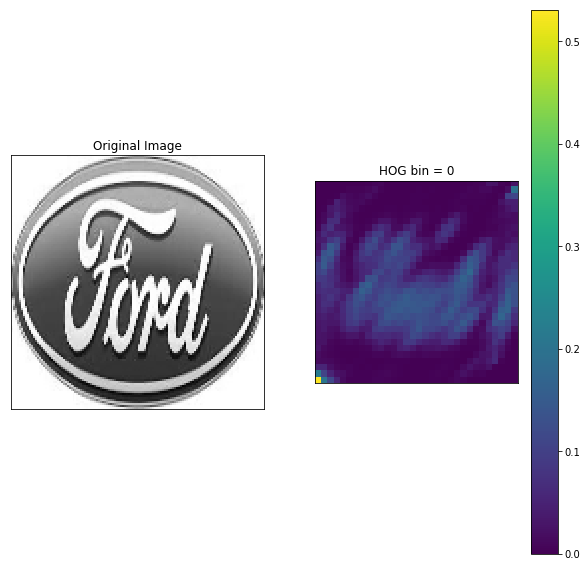

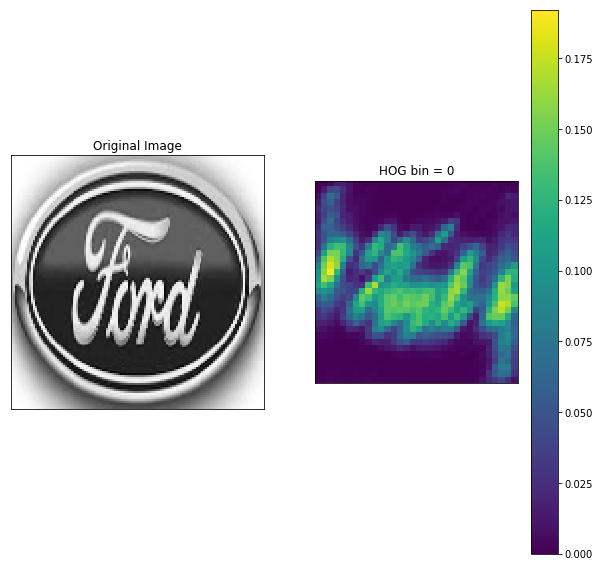

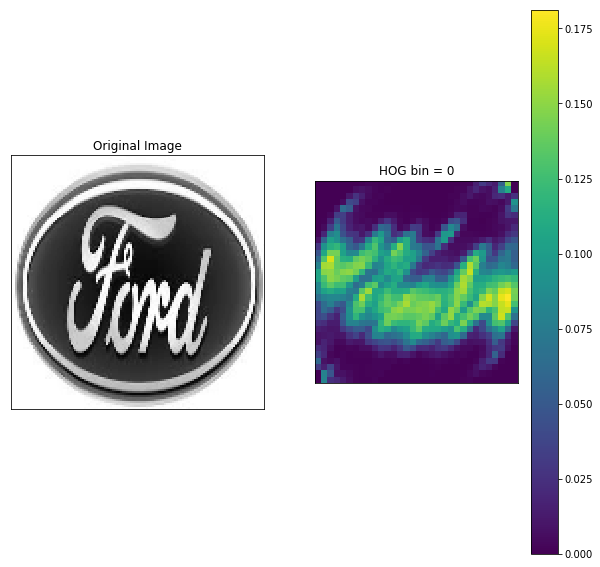

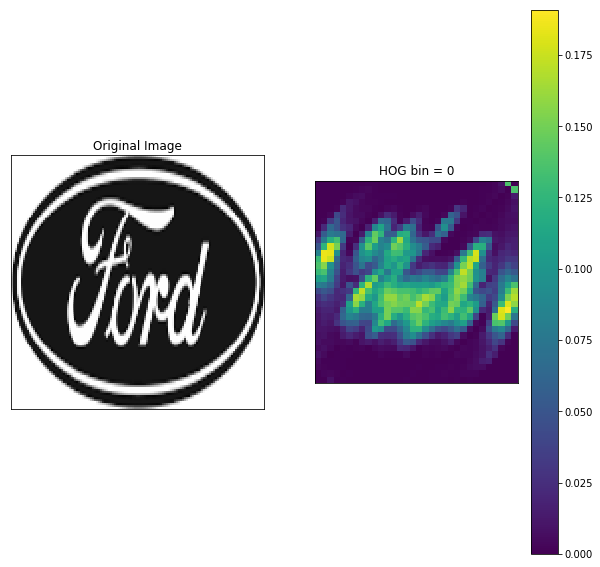

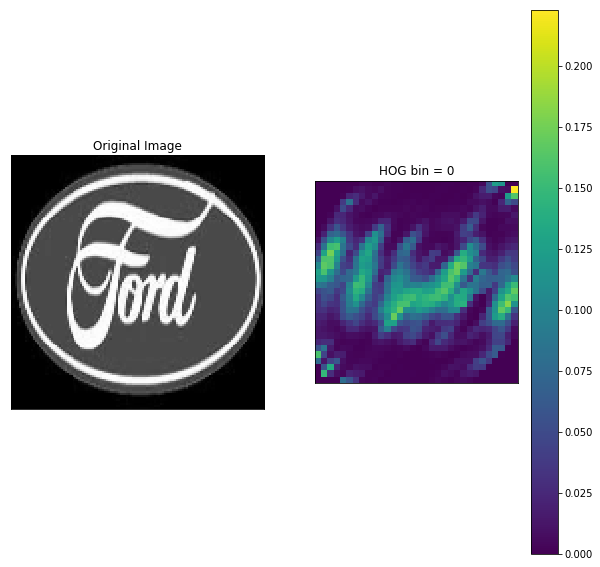

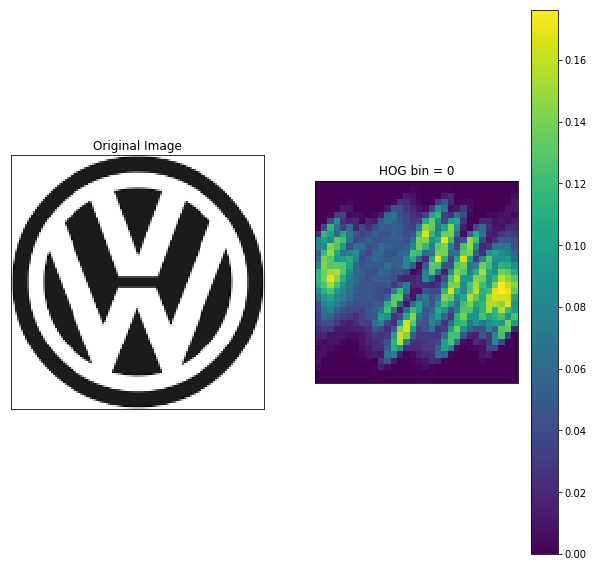

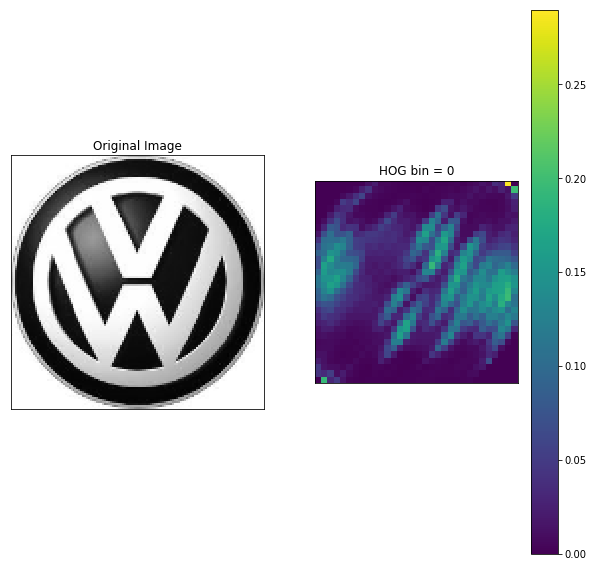

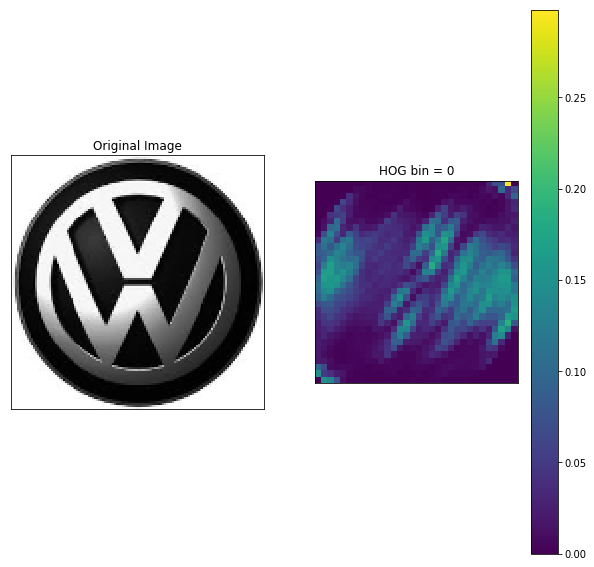

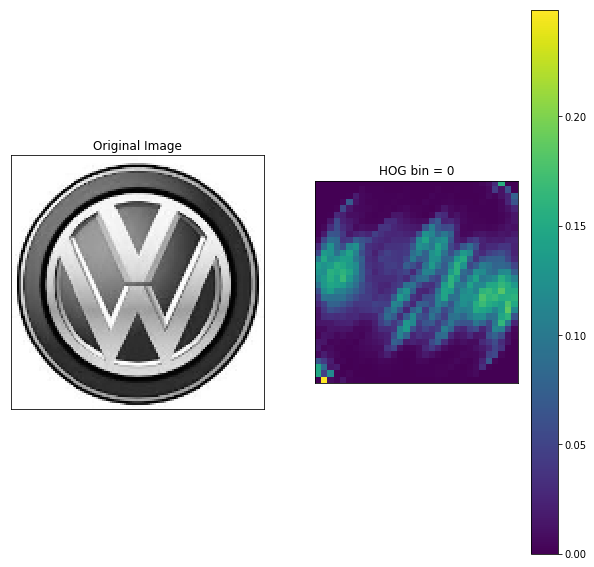

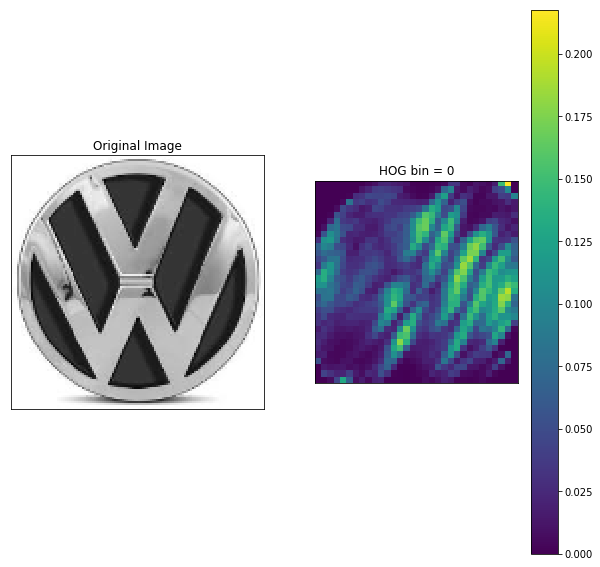

In [3]:
cell_size = (4, 4)  # h x w in pixels
block_size = (4, 4)  # h x w in cells
nbins = 8  # number of orientation bins

""" Finding the HoG Descriptors """
def findHOGDescriptor(img, cell_size, block_size, nbins):
    
    # Convert image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # create HoG Object
    # winSize is the size of the image cropped to an multiple of the cell size
    hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                      img.shape[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins)

    n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])

    # Compute HoG features
    hog_feats = hog.compute(img)\
                   .reshape(n_cells[1] - block_size[1] + 1,
                            n_cells[0] - block_size[0] + 1,
                            block_size[0], block_size[1], nbins) \
                   .transpose((1, 0, 2, 3, 4))  # index blocks by rows first

    # hog_feats now contains the gradient amplitudes for each direction,for each cell of its group for each group.
    # Indexing is by rows then columns.

    # computation for BlockNorm
    gradients = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
    cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                      off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                hog_feats[:, :, off_y, off_x, :]
            cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                       off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

    # Average gradients
    gradients /= cell_count

    # Preview
    plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image"), plt.xticks([]), plt.yticks([])

    bin = 0  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(gradients[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin = 0"), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
    return hog_feats

# Find all the HoG Descriptors for the training set
hogf1 = findHOGDescriptor(ford_train1, cell_size, block_size, nbins)
hogf2 = findHOGDescriptor(ford_train2, cell_size, block_size, nbins)
hogf3 = findHOGDescriptor(ford_train3, cell_size, block_size, nbins)
hogf4 = findHOGDescriptor(ford_train4, cell_size, block_size, nbins)
hogf5 = findHOGDescriptor(ford_train5, cell_size, block_size, nbins)
hogv1 = findHOGDescriptor(volks_train1, cell_size, block_size, nbins)
hogv2 = findHOGDescriptor(volks_train2, cell_size, block_size, nbins)
hogv3 = findHOGDescriptor(volks_train3, cell_size, block_size, nbins)
hogv4 = findHOGDescriptor(volks_train4, cell_size, block_size, nbins)
hogv5 = findHOGDescriptor(volks_train5, cell_size, block_size, nbins)

## 3. Fit a nearest neighbor classifier with three neighbors. Use KNeighborsClassifier from sklearn library.

In [4]:
# Gathering training set
train = [hogf1, hogf2, hogf3, hogf4, hogf5, hogv1, hogv2, hogv3, hogv4, hogv5]
train = np.asarray(train)
train = train.reshape(10, -1)

# Gathering the results for HoG Features  
labels = [1, 1, 1, 1, 1, -1, -1, -1, -1, -1]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train, labels) 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

## Testing

## 1. Resize test images to 128 × 128

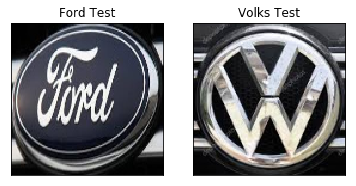

In [5]:
# Load the test images
ford_test = cv2.imread("./dataset/ford_test.jpeg")
volks_test = cv2.imread("./dataset/volks_test.jpeg")

ford_test = cv2.cvtColor(ford_test, cv2.COLOR_BGR2RGB)
volks_test = cv2.cvtColor(volks_test, cv2.COLOR_BGR2RGB)

# Resize the test images 
ford_test = cv2.resize(ford_test, (128, 128))
volks_test = cv2.resize(volks_test, (128, 128))

# Display the test images
plt.subplot(121), plt.imshow(ford_test)
plt.title("Ford Test"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(volks_test)
plt.title("Volks Test"), plt.xticks([]), plt.yticks([])
plt.show()

## 2. Compute HoG features similar to what was done during training.

## 3. Display the features for both test images

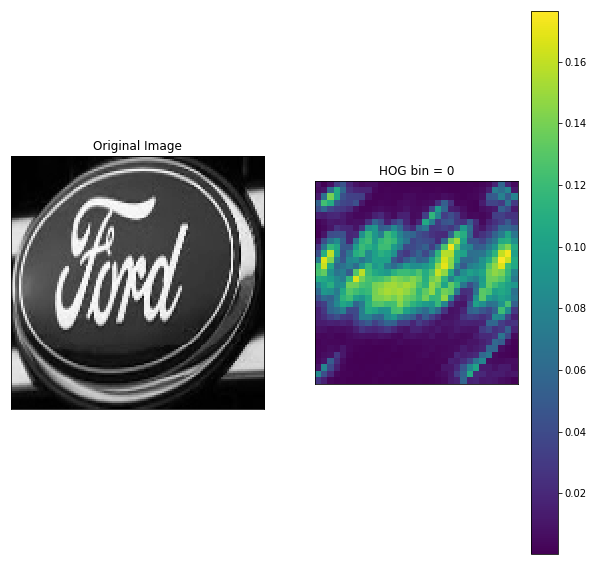

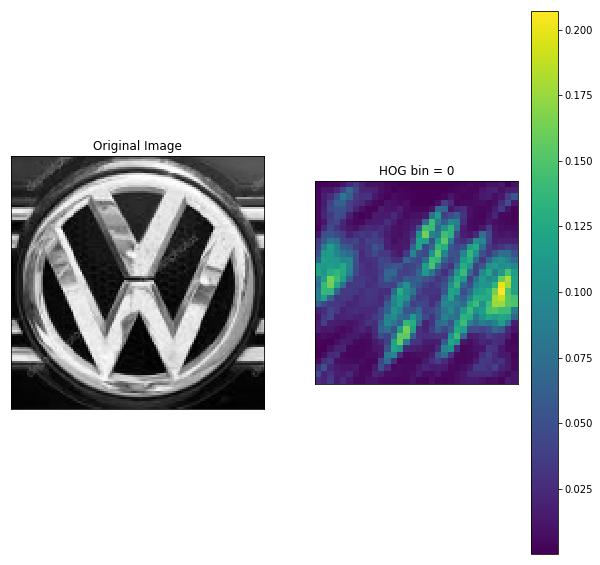

In [6]:
# Find all the HoG Descriptors for the testing set
hogftest = findHOGDescriptor(ford_test, cell_size, block_size, nbins)
hogvtest = findHOGDescriptor(volks_test, cell_size, block_size, nbins)

## 4. Classify the test images using the classifier built above.

In [7]:
# Gathering test data
test = [hogftest, hogvtest]
test = np.asarray(test)
test = test.reshape(2, -1)

# Predicting test data 
print(neigh.predict(test))

[ 1 -1]


# 3.2 Reasoning Questions

## 1. Will HoG work if images of logos undergo random rotation? If yes, which property of HoG avails this feature? If not, discuss the sequence of computer vision technique(s) that can be used in order to regain uniform orientation of the logos.

HoG will not work if the images undergo random rotation because HoG is not rotation invariant. To correct this you can perform rotation in the training set or use another technique that is rotation invariant like SIFT

## 2. Consider that you are given a large dataset with three types of images: variable sized squares with either or both diagonals drawn (see Figure 3). How many and which directions of the gradient are sufficient in order to correctly classify the images into three categories?